In [1]:
import cv2 
import numpy as np
import matplotlib.pyplot as plt 

# 폰트 설정

In [2]:
import matplotlib.font_manager as fm

# 설치된 폰트 출력
# font_list = [font.name for font in fm.fontManager.ttflist]
# font_list

In [3]:
plt.rcParams['font.family'] = 'Nanum Gothic'

# 이미지 로드

## RGB 차선 인식

In [4]:
bgr_img_1 = cv2.imread('./road_0.png')  # 도로 사진
bgr_img_2 = cv2.imread('./road_3.png')  # 실제 도로 주행 사진 (시간대 : 아침)

rgb_img_1 = cv2.cvtColor(bgr_img_1, cv2.COLOR_BGR2RGB)
rgb_img_2 = cv2.cvtColor(bgr_img_2, cv2.COLOR_BGR2RGB)

In [5]:
rgb_images = [rgb_img_1, rgb_img_2]
rbg_titles = ['온라인 도로 사진 (RGB)', '실제 도로 주행 사진 (RGB)']

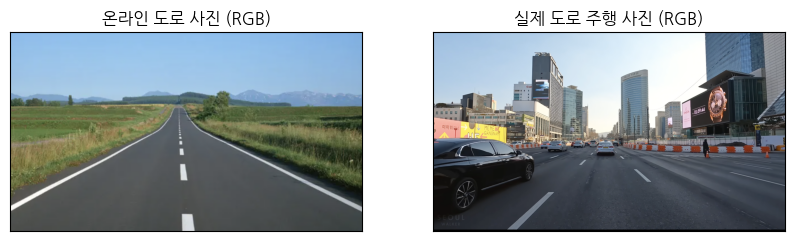

In [6]:
plt.figure(figsize = (10, 5))
for i in range(2):
    plt.subplot(1, 2, i+1)
    plt.imshow(rgb_images[i], 'gray')
    plt.title(rbg_titles[i])
    plt.xticks([]), plt.yticks([])
plt.show()

In [8]:
rgb_gaussian_1 = cv2.GaussianBlur(rgb_img_1, (5, 5), 0)
rgb_gaussian_2 = cv2.GaussianBlur(rgb_img_2, (5, 5), 0)

rgb_images += [rgb_gaussian_1, rgb_gaussian_2]
rbg_titles += ['온라인 도로 사진 가우시안 필터 (RGB)', '실제 도로 주행 사진 가우시안 필터 (RGB)']

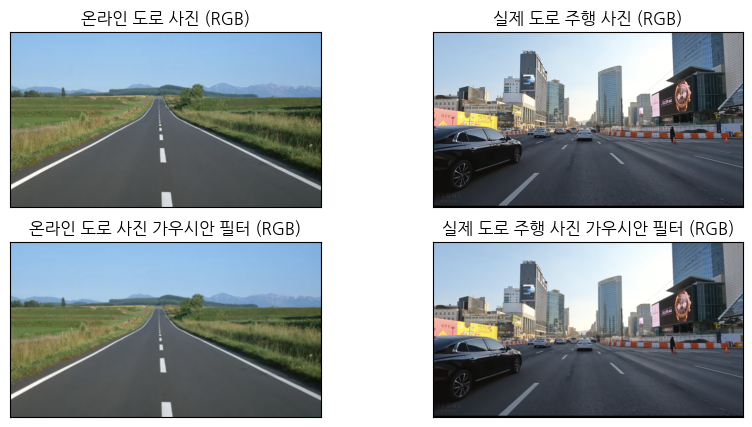

In [9]:
plt.figure(figsize = (10, 5))
for i in range(4):
    plt.subplot(2, 2, i+1)
    plt.imshow(rgb_images[i], 'gray')
    plt.title(rbg_titles[i])
    plt.xticks([]), plt.yticks([])
plt.show()

In [11]:
rgb_dst_1 = cv2.inRange(rgb_gaussian_1, (164, 155, 155), (255, 255, 255))
rgb_dst_2 = cv2.inRange(rgb_gaussian_2, (134, 123, 113), (255, 255, 255))

h1, w1, c1 = rgb_gaussian_1.shape
h2, w2, c2 = rgb_gaussian_2.shape

black_1 = np.zeros((h1, w1, c1), dtype=rgb_gaussian_1.dtype)
black_2 = np.zeros((h2, w2, c2), dtype=rgb_gaussian_2.dtype)

rgb_result_1 = cv2.bitwise_or(rgb_gaussian_1, black_1, mask=rgb_dst_1)
rgb_result_2 = cv2.bitwise_or(rgb_gaussian_2, black_2, mask=rgb_dst_2)

rgb_images += [rgb_result_1, rgb_result_2]
rbg_titles += ['온라인 도로 가우시안 필터 적용(BGR)', '실제 도로 사진 차선 가우시안 필터 적용(BGR)']

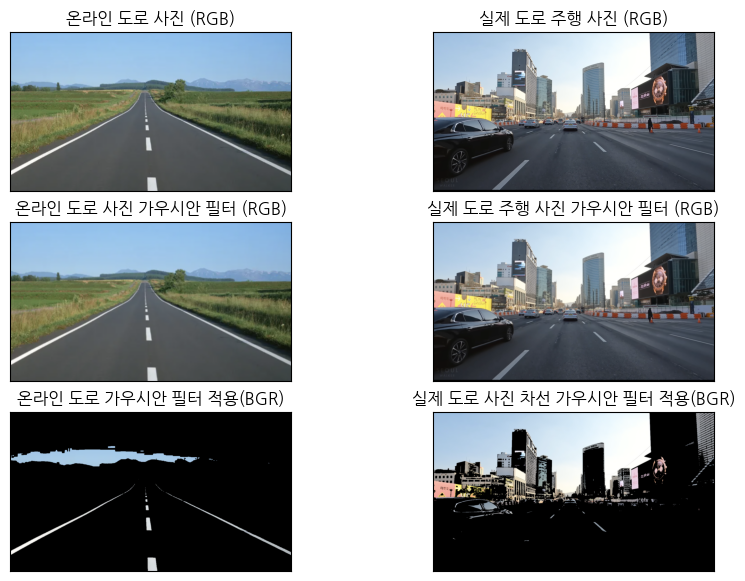

In [13]:
plt.figure(figsize = (10, 7))
for i in range(6):
    plt.subplot(3, 2, i+1)
    plt.imshow(rgb_images[i], 'gray')
    plt.title(rbg_titles[i])
    plt.xticks([]), plt.yticks([])
plt.show()

온라인 도로는 비교적 안정적인 사진을 보여주지만, 실제 도로 사진은 그렇지 못한 부분을 보여준다.  
- 가설을 세워보겠다.
    - 사진은 사진일 뿐 실제와 다르다.
        - 분명 길이 이뻐보이기 위해 사진을 올린 사람들 포토샵이나 어떤 작업을 거쳐서 밝게 했을 것이다. --> 따라서 차선이 뚜렷하다.
        - 하지만 아무런 보정도 거치지 않은 사진은 밝은 태양으로 인해 차들의 그림자가 생기며 이 그림자가 낮에는 도로를 어둡게 만들었다.

만약 낮이 아닌 햇빛이 없는 시간대의 사진을 넣는다면 자동차의 하향등 때문에 차선이 더 밝게 보일 것이다.  
따라서 다음 파일에서는 ROI을 추가하여 다시 해보겠다.